# コンピュータビジョン入門（Step 2）

**目的**  
- 画像の読み込み・表示  
- 前処理（リサイズ・グレースケール変換）  
- 特徴点検出（ORB）  
- 特徴量マッチング（Brute‐Force）

---

## セル 1: ライブラリのインポート

```python
import cv2
import numpy as np
import matplotlib.pyplot as plt
```


In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 日本語フォントを rcParams に指定
plt.rcParams['font.family']     = 'meiryo'
plt.rcParams['font.sans-serif'] = ['meiryo', 'Noto Sans CJK JP', 'Arial']  
# マイナス記号を正しく表示する設定
plt.rcParams['axes.unicode_minus'] = False


In [19]:
def imshow_cv(img, title='Image', figsize=(6,4)):
    """OpenCV 形式 (BGR) の画像を Matplotlib で表示"""
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=figsize)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(title)
    plt.show()


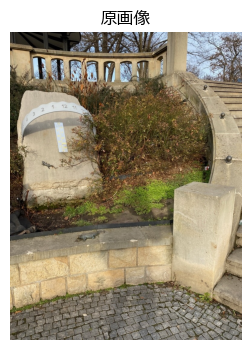

In [20]:
# 読み込む画像パスを設定
img_path = r"C:\Users\337587\PlayGround\01_Personal\Kaggle\image-matching-challenge-2025\data\train\imc2024_lizard_pond\lizard_00003.png"

# BGR 形式で読み込み
img = cv2.imread(img_path)
if img is None:
    raise FileNotFoundError(f"画像が見つかりません: {img_path}")

imshow_cv(img, title="原画像")


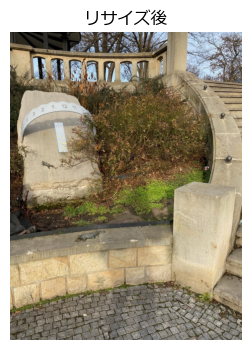

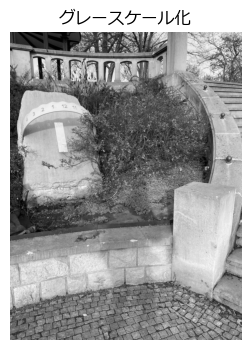

In [21]:
# リサイズ（短辺を 512px に固定）
h, w = img.shape[:2]
scale = 512 / min(h, w)
img_resized = cv2.resize(img, (int(w*scale), int(h*scale)), interpolation=cv2.INTER_AREA)

# グレースケール化
img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

# 表示
imshow_cv(img_resized, title="リサイズ後")
plt.figure(figsize=(6,4))
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.title("グレースケール化")
plt.show()


検出されたキーポイント数: 500


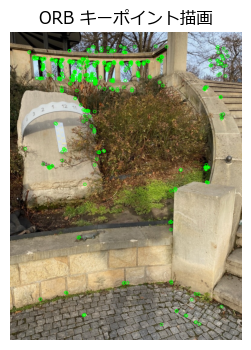

In [32]:
# ORB 検出器の作成
orb = cv2.ORB_create(nfeatures=500)

# キーポイント検出・特徴量記述子抽出
keypoints, descriptors = orb.detectAndCompute(img_gray, None)
print(f"検出されたキーポイント数: {len(keypoints)}")

# キーポイントを描画
img_kp = cv2.drawKeypoints(img_resized, keypoints, None, color=(0,255,0), flags=0)
imshow_cv(img_kp, title="ORB キーポイント描画")


総マッチ数: 127


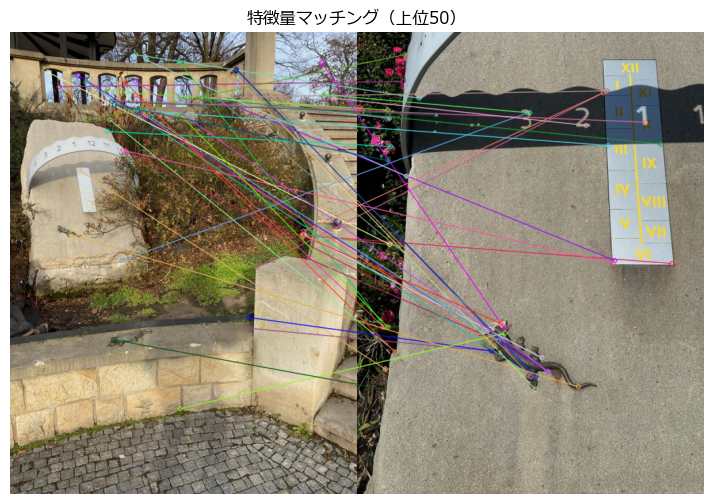

In [25]:
# もう一枚の画像パス
img2_path = r"C:\Users\337587\PlayGround\01_Personal\Kaggle\image-matching-challenge-2025\data\train\imc2024_lizard_pond\lizard_00014.png"
img2 = cv2.imread(img2_path)
img2_resized = cv2.resize(img2, (img_resized.shape[1], img_resized.shape[0]), interpolation=cv2.INTER_AREA)
img2_gray = cv2.cvtColor(img2_resized, cv2.COLOR_BGR2GRAY)

# ORB で同様に特徴抽出
kp2, des2 = orb.detectAndCompute(img2_gray, None)

# BFMatcher の作成（Hamming 距離）
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors, des2)
matches = sorted(matches, key=lambda x: x.distance)
print(f"総マッチ数: {len(matches)}")

# 上位 50 件を描画
img_match = cv2.drawMatches(
    img_resized, keypoints, 
    img2_resized, kp2, 
    matches[:50], None, 
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)
imshow_cv(img_match, title="特徴量マッチング（上位50）", figsize=(12,6))


## セル 7: 演習課題
 - ORB_create(nfeatures=...) のパラメータを変えて、検出数・マッチ数の違いを観察してみよう。

 - cv2.BFMatcher の引数を変更してマッチング品質を比較しよう。

 - SIFT（cv2.SIFT_create）を使った場合と ORB での比較を行ってみよう。（OpenCV contrib が必要）

検出されたキーポイント：300


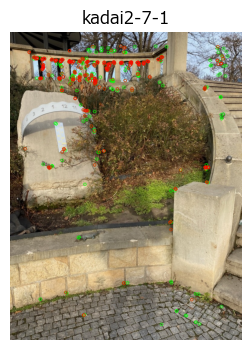

In [37]:
orb2 = cv2.ORB_create(nfeatures=300)
keypoints2, descriptors2 = orb2.detectAndCompute(img_resized, None)
print(f"検出されたキーポイント：{len(keypoints2)}")

img_kp =cv2.drawKeypoints(
    img_resized,
    keypoints,
    None,
    color = (0,255,0),
    flags = 0
)

#imshow_cv(img_kp,title = "kadai2-5")

img_kp2 =cv2.drawKeypoints(
    img_kp,
    keypoints2,
    None,
    color = (0,0,255),
    flags = 0
)

imshow_cv(img_kp2,title = "kadai2-7-1")

総マッチ数: 127


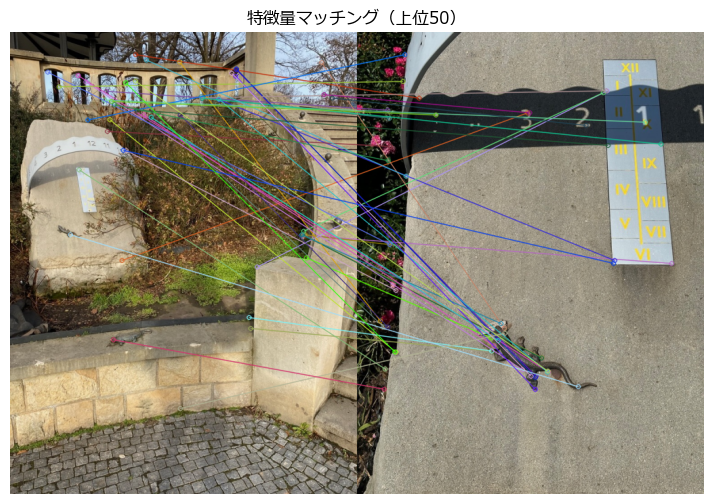

In [38]:
# もう一枚の画像パス
img2_path = r"C:\Users\337587\PlayGround\01_Personal\Kaggle\image-matching-challenge-2025\data\train\imc2024_lizard_pond\lizard_00014.png"
img2 = cv2.imread(img2_path)
img2_resized = cv2.resize(img2, (img_resized.shape[1], img_resized.shape[0]), interpolation=cv2.INTER_AREA)
img2_gray = cv2.cvtColor(img2_resized, cv2.COLOR_BGR2GRAY)

# ORB で同様に特徴抽出
kp2, des2 = orb.detectAndCompute(img2_gray, None)

# BFMatcher の作成（Hamming 距離）
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors, des2)
matches = sorted(matches, key=lambda x: x.distance)
print(f"総マッチ数: {len(matches)}")

# 上位 50 件を描画
img_match = cv2.drawMatches(
    img_resized, keypoints, 
    img2_resized, kp2, 
    matches[:50], None, 
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)
imshow_cv(img_match, title="特徴量マッチング（上位50）", figsize=(12,6))


総マッチ数: 86


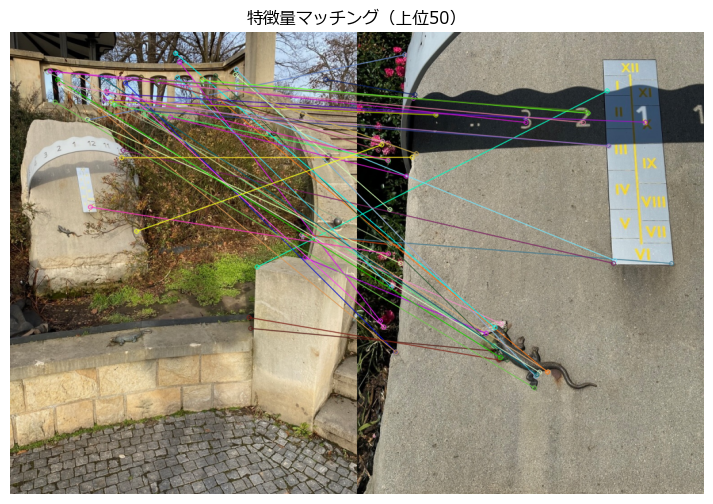

In [40]:
# もう一枚の画像パス
img2_path = r"C:\Users\337587\PlayGround\01_Personal\Kaggle\image-matching-challenge-2025\data\train\imc2024_lizard_pond\lizard_00014.png"
img2 = cv2.imread(img2_path)
img2_resized = cv2.resize(img2, (img_resized.shape[1], img_resized.shape[0]), interpolation=cv2.INTER_AREA)
img2_gray = cv2.cvtColor(img2_resized, cv2.COLOR_BGR2GRAY)

# ORB で同様に特徴抽出
kp2, des2 = orb2.detectAndCompute(img2_gray, None)

# BFMatcher の作成（Hamming 距離）
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors2, des2)
matches = sorted(matches, key=lambda x: x.distance)
print(f"総マッチ数: {len(matches)}")

# 上位 50 件を描画
img_match = cv2.drawMatches(
    img_resized, keypoints2, 
    img2_resized, kp2, 
    matches[:50], None, 
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)
imshow_cv(img_match, title="特徴量マッチング（上位50）", figsize=(12,6))
